In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
transaction_data = pd.read_csv("Transactions.csv")
customer_data= pd.read_csv("Customers.csv")
product_data = pd.read_csv("Products.csv")
print(transaction_data.shape)
print(customer_data.shape)
print(product_data.shape)


(1000, 7)
(200, 4)
(100, 4)


In [3]:
def info(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtype = df[col].dtype
        null_value_count = df[col].isnull().sum()
        nunique = df[col].nunique()
        l.append([dtype,null_value_count,nunique])
    return pd.DataFrame(l,columns=['dtype','null_value_count','nunique'],index=columns)
print(info(transaction_data),"\n")
print(info(customer_data),"\n")
print(info(product_data))
        

                   dtype  null_value_count  nunique
TransactionID     object                 0     1000
CustomerID        object                 0      199
ProductID         object                 0      100
TransactionDate   object                 0     1000
Quantity           int64                 0        4
TotalValue       float64                 0      369
Price            float64                 0      100 

               dtype  null_value_count  nunique
CustomerID    object                 0      200
CustomerName  object                 0      200
Region        object                 0        4
SignupDate    object                 0      179 

               dtype  null_value_count  nunique
ProductID     object                 0      100
ProductName   object                 0       66
Category      object                 0        4
Price        float64                 0      100


## EDA

## concate all data

In [4]:
transactions_data = pd.merge(transaction_data, customer_data, on="CustomerID", how="inner")

consolidated_data = pd.merge(transaction_data, product_data, on="ProductID", how="inner")

# Display the consolidated dataset
consolidated_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68


### drop unwanted columns

In [5]:
consolidated_data.drop(columns=["TransactionID","ProductID","ProductName","Price_x"],inplace=True)

In [6]:
consolidated_data.head(10)

,CustomerID,TransactionDate,Quantity,TotalValue,Category,Price_y
0,C0199,2024-08-25 12:38:23,1,300.68,Electronics,300.68
1,C0146,2024-05-27 22:23:54,1,300.68,Electronics,300.68
2,C0127,2024-04-25 07:38:55,1,300.68,Electronics,300.68
3,C0087,2024-03-26 22:55:37,2,601.36,Electronics,300.68
4,C0070,2024-03-21 15:10:10,3,902.04,Electronics,300.68
5,C0188,2024-12-26 14:40:03,1,300.68,Electronics,300.68
6,C0195,2024-11-24 11:49:48,3,902.04,Electronics,300.68
7,C0008,2024-09-22 06:13:59,1,300.68,Electronics,300.68
8,C0157,2024-12-07 17:57:40,3,902.04,Electronics,300.68
9,C0130,2024-05-14 23:14:59,2,601.36,Electronics,300.68


In [7]:
consolidated_data["Category"].value_counts()

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

C:\Users\naidu\AppData\Local\Temp\ipykernel_26936\1511132950.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


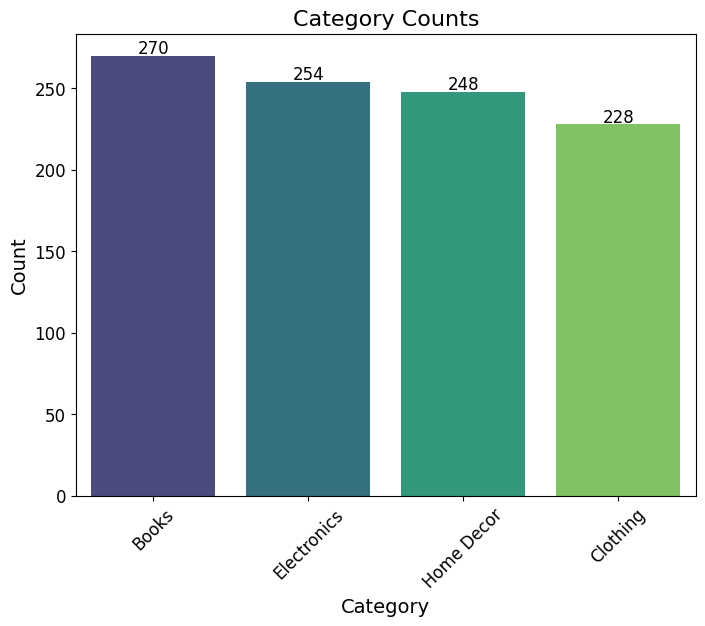

In [8]:
# Count the occurrences of each category
category_counts = consolidated_data["Category"].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Add count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Category Counts', fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x labels by 45 degrees
plt.yticks(fontsize=12)
plt.show()

## Business Insight

The bar plot of category counts reveals the distribution of transactions across different product categories. This information is crucial for understanding customer preferences and product performance. 

- **Category Distribution**: The plot shows the number of transactions for each category. Categories with higher counts indicate more popular products among customers.
- **Strategic Decisions**: Businesses can use this insight to make informed decisions about inventory management, marketing strategies, and product development. For example, if the "Electronics" category has the highest count, the business might consider expanding its electronics product line or running targeted promotions for electronics.
- **Resource Allocation**: Understanding which categories are most popular can help in allocating resources more effectively. More popular categories might require more stock, dedicated marketing efforts, and customer support resources.
- **Trend Analysis**: By regularly monitoring category counts, businesses can identify trends and shifts in customer preferences over time. This can help in adapting to market changes and staying competitive.

Overall, the category count analysis provides valuable insights that can drive business growth and customer satisfaction.

In [9]:
consolidated_data.head(2)

,CustomerID,TransactionDate,Quantity,TotalValue,Category,Price_y
0,C0199,2024-08-25 12:38:23,1,300.68,Electronics,300.68
1,C0146,2024-05-27 22:23:54,1,300.68,Electronics,300.68


In [10]:
num_cols=["Quantity","TotalValue","Price_y"]

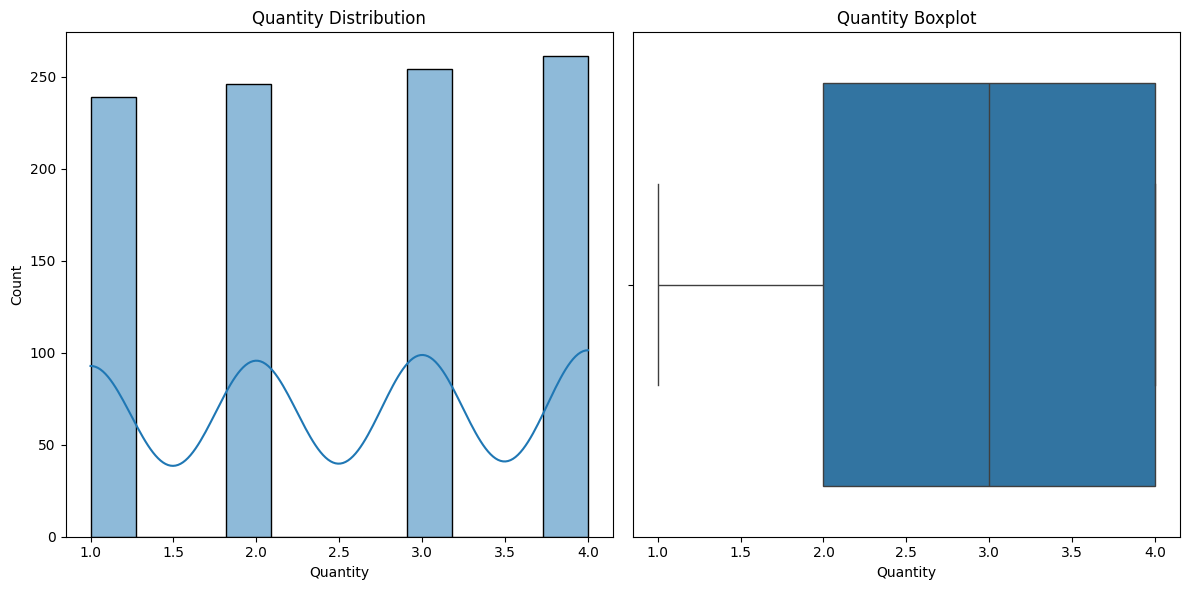

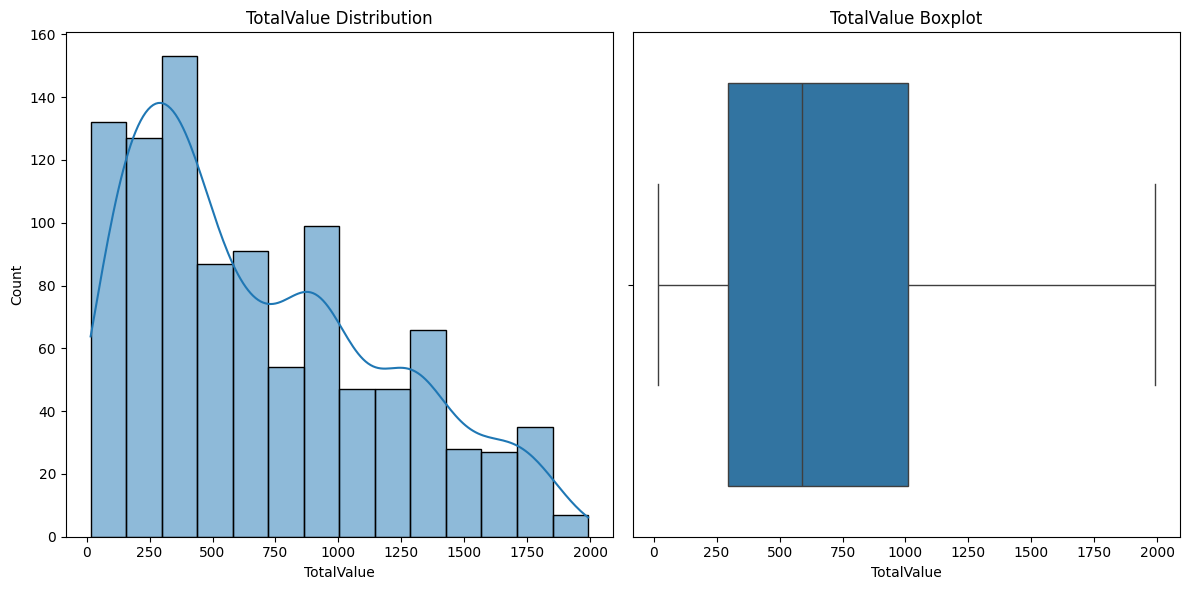

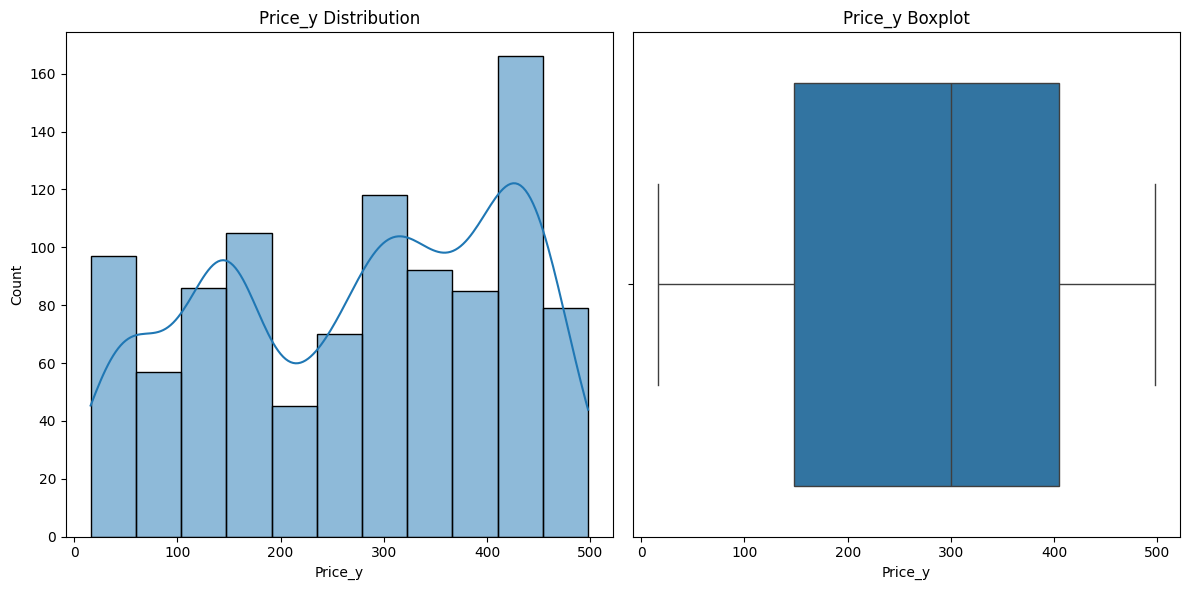

In [11]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the distribution plot in the first subplot
    sns.histplot(consolidated_data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')

    # Plot the boxplot in the second subplot
    sns.boxplot(x=consolidated_data[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')

    # Display the plots
    plt.tight_layout()
    plt.show()

## Business Insight

The distribution plots and boxplots for the numerical columns provide valuable insights into the data:

- **Quantity Distribution**: The distribution plot for `Quantity` shows how many items are typically purchased in a transaction. The boxplot helps identify any outliers, which could indicate unusually large purchases or data entry errors. Understanding the typical purchase quantity can help in inventory management and forecasting demand.

- **TotalValue Distribution**: The distribution plot for `TotalValue` shows the distribution of the total transaction values. The boxplot helps identify outliers, which could be high-value transactions. This information is useful for identifying key customers and understanding the revenue distribution. High-value transactions might indicate bulk purchases or high-priced items, which can be targeted for special promotions or loyalty programs.

- **Price Distribution**: The distribution plot for `Price_y` (assuming it represents the price of individual items) shows the range and frequency of item prices. The boxplot helps identify any outliers, which could be unusually high or low prices. Understanding the price distribution can help in pricing strategy and identifying popular price points. It can also help in detecting pricing errors or anomalies.

Overall, these visualizations provide a comprehensive view of the numerical data, helping businesses make informed decisions about inventory, pricing, and customer targeting. Identifying outliers and understanding the distribution of key metrics are crucial steps in data-driven decision-making.

In [12]:
consolidated_data.head(2)

,CustomerID,TransactionDate,Quantity,TotalValue,Category,Price_y
0,C0199,2024-08-25 12:38:23,1,300.68,Electronics,300.68
1,C0146,2024-05-27 22:23:54,1,300.68,Electronics,300.68


In [13]:
consolidated_data['TransactionDate'] = pd.to_datetime(consolidated_data['TransactionDate'])

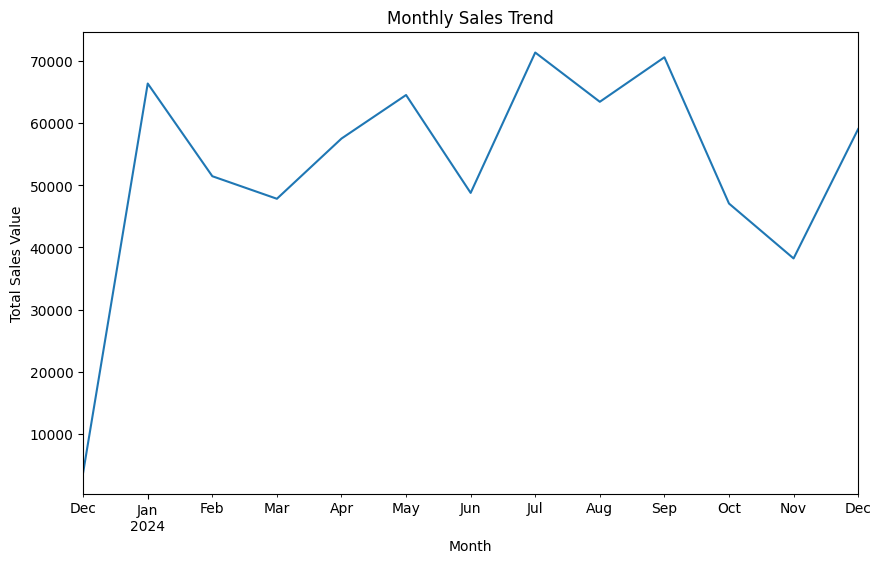

In [14]:
# Group by monthly periods and sum 'TotalValue'
sales_trend = (
    consolidated_data
    .groupby(consolidated_data['TransactionDate'].dt.to_period('M'))['TotalValue']
    .sum()
)

# Plotting the sales trend
sales_trend.plot(title="Monthly Sales Trend", figsize=(10, 6))
plt.ylabel("Total Sales Value")
plt.xlabel("Month")
plt.show()


## Business Insight

The monthly sales trend plot provides valuable insights into the business's performance over time:

- **Seasonal Trends**: By observing the peaks and troughs in the sales trend, businesses can identify seasonal patterns. For example, if there is a consistent increase in sales during certain months, it could indicate a seasonal demand for certain products. This information can help in planning inventory and marketing strategies to capitalize on peak seasons.

- **Growth Analysis**: The trend line can help in assessing the overall growth of the business. An upward trend indicates positive growth, while a downward trend may signal potential issues that need to be addressed. Businesses can use this information to evaluate the effectiveness of their strategies and make necessary adjustments.

- **Sales Forecasting**: Understanding the sales trend is crucial for accurate sales forecasting. By analyzing past trends, businesses can predict future sales and make informed decisions about production, staffing, and budgeting.

- **Impact of Promotions**: If there are spikes in sales during certain periods, it could be due to promotions or marketing campaigns. Analyzing these spikes can help businesses understand the impact of their promotional efforts and optimize future campaigns for better results.

- **Market Changes**: Significant changes in the sales trend can indicate shifts in the market or consumer behavior. Businesses can use this information to adapt to changing market conditions and stay competitive.

Overall, the monthly sales trend analysis provides a comprehensive view of the business's performance, helping in strategic planning and decision-making to drive growth and profitability.

In [15]:
consolidated_data.info

<bound method DataFrame.info of     CustomerID     TransactionDate  Quantity  TotalValue     Category  Price_y
0        C0199 2024-08-25 12:38:23         1      300.68  Electronics   300.68
1        C0146 2024-05-27 22:23:54         1      300.68  Electronics   300.68
2        C0127 2024-04-25 07:38:55         1      300.68  Electronics   300.68
3        C0087 2024-03-26 22:55:37         2      601.36  Electronics   300.68
4        C0070 2024-03-21 15:10:10         3      902.04  Electronics   300.68
..         ...                 ...       ...         ...          ...      ...
995      C0118 2024-10-24 08:30:27         1      459.86  Electronics   459.86
996      C0059 2024-06-04 02:15:24         3     1379.58  Electronics   459.86
997      C0018 2024-04-05 13:05:32         4     1839.44  Electronics   459.86
998      C0115 2024-09-29 10:16:02         2      919.72  Electronics   459.86
999      C0024 2024-04-21 10:52:24         1      459.86  Electronics   459.86

[1000 rows x 6 colu

## LabelEncoder

In [16]:
encoder = LabelEncoder()
consolidated_data["Category"]=encoder.fit_transform(consolidated_data.Category)

In [17]:
encoder.classes_

array(['Books', 'Clothing', 'Electronics', 'Home Decor'], dtype=object)

- BOOks_label as 0,  
- Clothing label as 1, 
- Electronics label as 2, 
- Home Decor label  as 3

In [18]:
consolidated_data.head()

,CustomerID,TransactionDate,Quantity,TotalValue,Category,Price_y
0,C0199,2024-08-25 12:38:23,1,300.68,2,300.68
1,C0146,2024-05-27 22:23:54,1,300.68,2,300.68
2,C0127,2024-04-25 07:38:55,1,300.68,2,300.68
3,C0087,2024-03-26 22:55:37,2,601.36,2,300.68
4,C0070,2024-03-21 15:10:10,3,902.04,2,300.68


## convert TransactionDate into day of week, month and year

In [19]:
consolidated_data['DayOfWeek'] = consolidated_data['TransactionDate'].dt.dayofweek
consolidated_data['Month'] = consolidated_data['TransactionDate'].dt.month
consolidated_data['Year'] = consolidated_data['TransactionDate'].dt.year

In [20]:
consolidated_data.head(2)

,CustomerID,TransactionDate,Quantity,TotalValue,Category,Price_y,DayOfWeek,Month,Year
0,C0199,2024-08-25 12:38:23,1,300.68,2,300.68,6,8,2024
1,C0146,2024-05-27 22:23:54,1,300.68,2,300.68,0,5,2024


In [21]:
consolidated_data.drop(columns= ["TransactionDate"],inplace=True) 

In [22]:
consolidated_data.head(2)

,CustomerID,Quantity,TotalValue,Category,Price_y,DayOfWeek,Month,Year
0,C0199,1,300.68,2,300.68,6,8,2024
1,C0146,1,300.68,2,300.68,0,5,2024


## MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(consolidated_data.drop('CustomerID', axis=1)),
                               columns=['Quantity','TotalValue','Category','Price_y','DayOfWeek','Month','Year'])
scaled_features

,Quantity,TotalValue,Category,Price_y,DayOfWeek,Month,Year
0,0.000000,0.144104,0.666667,0.590849,1.000000,0.636364,1.0
1,0.000000,0.144104,0.666667,0.590849,0.000000,0.363636,1.0
2,0.000000,0.144104,0.666667,0.590849,0.500000,0.272727,1.0
3,0.333333,0.296350,0.666667,0.590849,0.166667,0.181818,1.0
4,0.666667,0.448596,0.666667,0.590849,0.500000,0.181818,1.0
...,...,...,...,...,...,...,...
995,0.000000,0.224703,0.666667,0.921317,0.500000,0.818182,1.0
996,0.666667,0.690394,0.666667,0.921317,0.166667,0.454545,1.0
997,1.000000,0.923239,0.666667,0.921317,0.666667,0.272727,1.0
998,0.333333,0.457549,0.666667,0.921317,1.000000,0.727273,1.0


<Axes: >

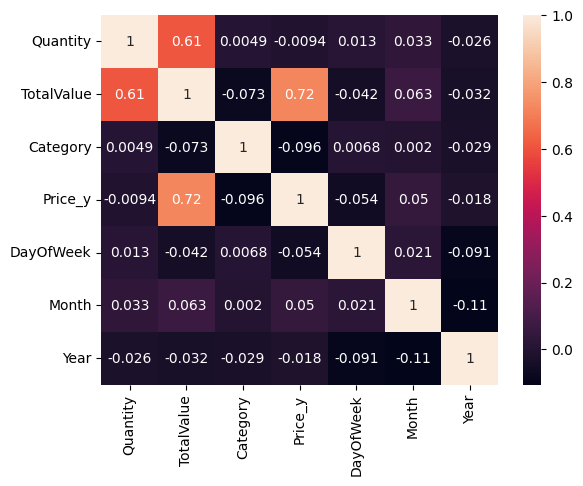

In [24]:
sns.heatmap(scaled_features.corr(),annot=True)

## Observation on Heatmap

The heatmap displays the correlation matrix of the scaled features in the dataset. Here are some key observations:

- **Quantity and TotalValue**: There is a strong positive correlation between `Quantity` and `TotalValue`. This indicates that as the quantity of items purchased increases, the total value of the transaction also increases.
- **Category**: The `Category` feature shows a weak correlation with other features, suggesting that the category of the product does not have a strong linear relationship with the quantity, total value, or price.
- **Price_y**: The `Price_y` feature has a moderate positive correlation with `TotalValue`, indicating that higher-priced items contribute more to the total transaction value.
- **DayOfWeek, Month, and Year**: These temporal features show weak correlations with other features, suggesting that the day of the week, month, and year do not have a strong linear relationship with the quantity, total value, or price of transactions.

Overall, the heatmap helps in identifying the strength and direction of linear relationships between different features in the dataset. This information can be useful for feature selection and understanding the underlying patterns in the data.

In [25]:
# Compute similarity matrix
similarity_matrix = cosine_similarity(scaled_features)
similarity_df = pd.DataFrame(similarity_matrix, index=consolidated_data['CustomerID'], columns=consolidated_data['CustomerID'])

In [26]:
lookalike_map = {}

for customer_id in consolidated_data['CustomerID']:
#     # Sort by similarity score (excluding the customer itself)
    similar_customers = similarity_df[customer_id].sort_index()
    lookalike_map[customer_id] = list(zip(similar_customers.index, similar_customers.values))

# # Extract for customers C0001 to C0020
top_20_lookalikes = {k: v for k, v in lookalike_map.items() if k in consolidated_data['CustomerID'][:20].values}

# # Save to CSV
import csv

with open('Lookalike.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['cust_id', 'lookalikes'])
    for cust_id, lookalikes in top_20_lookalikes.items():
        writer.writerow([cust_id, lookalikes])


In [27]:
consolidated_data

,CustomerID,Quantity,TotalValue,Category,Price_y,DayOfWeek,Month,Year
0,C0199,1,300.68,2,300.68,6,8,2024
1,C0146,1,300.68,2,300.68,0,5,2024
2,C0127,1,300.68,2,300.68,3,4,2024
3,C0087,2,601.36,2,300.68,1,3,2024
4,C0070,3,902.04,2,300.68,3,3,2024
...,...,...,...,...,...,...,...,...
995,C0118,1,459.86,2,459.86,3,10,2024
996,C0059,3,1379.58,2,459.86,1,6,2024
997,C0018,4,1839.44,2,459.86,4,4,2024
998,C0115,2,919.72,2,459.86,6,9,2024


In [29]:
consolidated_data['CustomerID'].sort_values(ascending=True)


NameError: name 'DataFrame' is not defined